In [1]:
# import
from keras.datasets import mnist
from keras import models
from keras import layers
from keras.utils import to_categorical

from matplotlib import pyplot as plt

Using Theano backend.


In [2]:
%matplotlib inline

### Loading the data

In [3]:
(train_image, train_labels),(test_image, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 20s 2us/step


In [4]:
train_image.shape  # 3-D Matrices

(60000, 28, 28)

In [5]:
len(train_image)  # total count of input img 

60000

In [6]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

### The Network

In [8]:
net = models.Sequential()
net.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
net.add(layers.Dense(10, activation='softmax'))

In [9]:
# compilation
net.compile(optimizer='rmsprop',
           loss='categorical_crossentropy',
                      metrics=['accuracy'])

### Preparing the input data   


In [10]:
train_image[0].shape  # 1 image size

(28, 28)

In [13]:
# reshaping it 
#train_image = train_image.reshape((60000, 28*28))
train_img = train_image.reshape((60000, -1))
# scaling the value of pixels in the 0,1 range by dividing 255
train_img = train_img.astype('float32')/255

In [14]:
print(train_image.shape)
print(train_img.shape)

(60000, 28, 28)
(60000, 784)


In [15]:
train_img[0].shape

(784,)

**Preparing the same for test data**

In [16]:
# reshaping it 
test_img = test_image.reshape((10000, 28*28))
# scaling the value of pixels in the 0,1 range by dividing 255
test_img = test_img.astype('float32')/255

### Encoding the labels as Categorical

In [17]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [18]:
train_labels[0].dtype

dtype('float64')

In [19]:
train_labels[0]

array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.])

### Training the Network 

In [20]:
net.fit(train_img, train_labels, batch_size=128, epochs=5)

WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.


Epoch 1/5
60000/60000 [==============================] - 4s 66us/step - loss: 0.2606 - acc: 0.9233
Epoch 2/5
60000/60000 [==============================] - 4s 61us/step - loss: 0.1042 - acc: 0.9697
Epoch 3/5
60000/60000 [==============================] - 4s 64us/step - loss: 0.0683 - acc: 0.9798
Epoch 4/5
60000/60000 [==============================] - 4s 65us/step - loss: 0.0502 - acc: 0.9850
Epoch 5/5
60000/60000 [==============================] - 4s 64us/step - loss: 0.0367 - acc: 0.9896


In [22]:
test_loss, test_acc = net.evaluate(test_img, test_labels)
print(test_loss, test_acc)

10000/10000 [==============================] - 0s 20us/step
0.0661348462942 0.9801


### Display the data

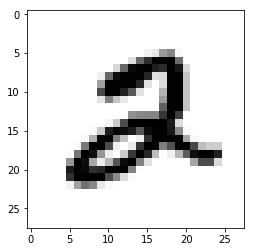

In [103]:
digit = train_img[5]
plt.imshow(digit, cmap=plt.cm.binary)